# 1. 라이브러리, 데이터 import

In [54]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

In [55]:
df = pd.read_csv('./csv/Preprocessed_final_Data.csv', index_col=0)

Loan_list = ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']
Month_list=['Month_August','Month_February','Month_January','Month_July','Month_June','Month_March','Month_May']
PB_list = ['Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments']
OC_list = ['Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']

df = df.drop(OC_list, axis=1)
df = df.drop(PB_list, axis=1)
df = df.drop(Loan_list, axis=1)
df = df.drop(Month_list, axis=1)

# df = df[['Credit_History_Age', 'Num_Bank_Accounts', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Delay_from_due_date']]

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.311110,10.618880,14.000000,25.000000,33.000000,41.000000,56.000000
Annual_Income,100000.0,48046.898523,34706.155065,7005.930000,19457.500000,37578.610000,68655.405000,152574.760000
Monthly_Inhand_Salary,100000.0,3983.576117,2875.553530,303.645417,1626.594167,3096.836667,5712.553333,12461.296667
Num_Bank_Accounts,100000.0,5.413080,2.508894,1.000000,3.000000,5.000000,7.000000,18.000000
Num_Credit_Card,100000.0,5.534440,2.068496,1.000000,4.000000,5.000000,7.000000,18.000000
Interest_Rate,100000.0,14.531440,8.739453,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,-0.507070,20.191464,-100.000000,1.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,19.415900,12.638937,-5.000000,10.000000,18.000000,26.000000,55.000000
Num_of_Delayed_Payment,100000.0,13.320820,6.289298,-3.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.241045,6.575751,-6.490000,5.320000,9.400000,14.600000,29.160000


## 컬럼 번역

In [56]:
## 컬럼 번역

# df = df.rename({'Age' : '나이', \
#     'Annual_Income' : '연간수입', \
#         'Monthly_Inhand_Salary' : '월_실수령액', \
#             'Num_Bank_Accounts' : '총계좌수', \
#                 'Num_Credit_Card' : '신용카드수', \
#                     'Interest_Rate' : '신용카드_이자율', \
#                         'Num_of_Loan' : '대출수', \
#                             'Num_of_Delayed_Payment' : '체불횟수', \
#                                 'Changed_Credit_Limit' : '신용카드_한도_변경율', \
#                                     'Num_Credit_Inquiries' : '신용조회수', \
#                                         'Credit_Mix' : '신용카드_상품구성', \
#                                             'Outstanding_Debt' : '체불액', \
#                                                 'Credit_Utilization_Ratio' : '신용카드_사용률', \
#                                                     'Credit_History_Age' : '신용기록나이', \
#                                                         'Total_EMI_per_month' : '월_원리상환금', \
#                                                             'Amount_invested_monthly' : '월_투자액', \
#                                                                 'Monthly_Balance' : '월별잔액', \
#                                                                     'Credit_Score' : '신용점수', \
#                                                                         'Payment_of_Min_Amount_Yes' : '최소금_지불'}, axis='columns')
# df = df.rename({'Delay_from_due_date' : '연체일수'}, axis='columns')
# df

# 2. X,y 처리

In [57]:
target = 'Delay_from_due_date'

y = df[target] # 종속변인 추출
X = df.drop(target, axis=1)

In [58]:
for i in range(len(y)):
    if y[i] < 5 :
        y[i] = "단기연체자"
    else:
        y[i] = "장기연체자"

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_95470/3723472716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = "단기연체자"


In [61]:
#y=y.astype("int")
y.value_counts()

단기연체자    7862
장기연체자    7862
Name: Delay_from_due_date, dtype: int64

## 언더샘플링

In [62]:
# from imblearn.over_sampling import SMOTE
# rus = SMOTE(sampling_strategy='auto')
# X_data_rus, y_data_rus = rus.fit_resample(X, y)

# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=156)
X, y = rus.fit_resample(X, y)

In [63]:
y.value_counts(normalize=True)

단기연체자    0.5
장기연체자    0.5
Name: Delay_from_due_date, dtype: float64

In [64]:
y.value_counts()

단기연체자    7862
장기연체자    7862
Name: Delay_from_due_date, dtype: int64

In [65]:
# df = df.sample(n=10000, random_state=100)
# df.reset_index(inplace=False)
# df

In [66]:
# # 정규화
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# clustering_sc = sc.fit_transform(X)

In [67]:
# X["Delay_from_due_date"] = y
# df = X

In [68]:
# df_dataframe = pd.DataFrame(df)
# df_dataframe.columns = ['Credit_History_Age', 'Num_Bank_Accounts', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'cluster']
# # df_dataframe.columns = ['Age', 'Annual_Income', 'Oustanding_Debt', 'Interest_Rate', 'Delay_from_due_date']
# df_dataframe

In [69]:
# # 그룹 특징파악
# df_dataframe.groupby('cluster').count()

---
# 3. plot

In [70]:
df = pd.concat([X, y], axis=1, sort=True)

label 0 data

In [74]:
df_y0 = df[df["Delay_from_due_date"]=="단기연체자"]
df_y0.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_Yes
count,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000
mean,36.548588,59329.848296,4884.334180,2.887688,4.158738,7.078988,-1.994658,6.622997,6.576694,3.110404,1.917578,735.844560,32.786850,288.428898,1526.949854,173.973876,389.386826,1.426355,0.056093
std,11.079841,38690.648929,3170.427520,1.678217,1.787456,4.289397,20.010104,4.633174,4.277897,2.276414,0.275024,466.464417,5.239758,67.801757,8839.928089,115.008785,136.599682,0.635712,0.230115
min,14.000000,7123.915000,447.497500,1.000000,1.000000,1.000000,-100.000000,-3.000000,-6.430000,0.000000,1.000000,0.230000,20.100770,63.000000,0.000000,0.000000,1.387200,0.000000,0.000000
25%,27.000000,31444.922500,2601.095833,1.000000,3.000000,4.000000,1.000000,3.000000,3.282500,1.000000,2.000000,338.300000,28.488897,233.000000,21.292807,95.751006,317.770039,1.000000,0.000000
50%,36.000000,41122.690000,3432.213333,3.000000,4.000000,7.000000,2.000000,6.000000,6.380000,3.000000,2.000000,716.710000,32.775540,289.000000,58.886044,136.279679,342.282963,2.000000,0.000000
75%,46.000000,87477.450000,7237.505000,4.000000,5.000000,10.000000,3.000000,10.000000,9.647500,4.000000,2.000000,1127.260000,37.012923,349.000000,149.079658,222.549818,457.234785,2.000000,0.000000
max,56.000000,152483.320000,12461.296667,9.000000,10.000000,34.000000,7.000000,23.000000,26.950000,17.000000,2.000000,2673.960000,48.176599,404.000000,82178.000000,555.454431,761.492599,2.000000,1.000000


label 1 data

In [75]:
df_y1 = df[df["Delay_from_due_date"]=="장기연체자"]
df_y1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_Yes
count,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000
mean,33.171585,46918.066725,3885.422359,5.624523,5.608497,15.191046,-0.663826,13.862376,10.551285,5.993132,0.997711,1288.776152,32.258219,215.504961,1287.168197,152.687500,350.515996,0.839863,0.564615
std,10.497518,34285.750723,2836.235453,2.468774,2.058765,8.728364,20.736676,6.092501,6.597630,3.850231,0.713149,905.666649,5.122193,100.270971,7938.561140,111.572557,133.227284,0.658179,0.495839
min,14.000000,7005.930000,319.556250,1.000000,1.000000,1.000000,-100.000000,-3.000000,-6.480000,0.000000,0.000000,0.950000,20.172942,2.000000,0.000000,0.000000,0.007760,0.000000,0.000000
25%,25.000000,19042.685000,1602.624063,4.000000,4.000000,8.000000,1.000000,10.000000,5.632500,3.000000,0.000000,593.277500,28.007627,137.000000,29.576082,73.272218,269.806403,0.000000,0.000000
50%,33.000000,36487.825000,2992.900000,6.000000,5.000000,15.000000,3.000000,14.000000,9.580000,6.000000,1.000000,1166.155000,32.331645,214.000000,69.527266,133.671707,332.021453,1.000000,1.000000
75%,41.000000,67102.410000,5541.957433,8.000000,7.000000,20.000000,5.000000,18.000000,15.085000,9.000000,2.000000,1727.767500,36.472434,295.000000,157.311123,190.899271,406.553718,1.000000,1.000000
max,56.000000,152574.760000,12452.330000,11.000000,11.000000,34.000000,9.000000,28.000000,29.160000,17.000000,2.000000,4014.350000,47.537031,403.000000,82204.000000,554.670447,761.601811,2.000000,1.000000


In [76]:
df.T
# 'Credit_History_Age', 'Num_Bank_Accounts'
#  'Outstanding_Debt', 'Num_of_Delayed_Payment'
#  'Payment_of_Min_Amount_Yes'

,0,1,2,3,4,5,6,7,8,9,...,15714,15715,15716,15717,15718,15719,15720,15721,15722,15723
Age,23.0,23.0,33.0,23.0,23.0,28.0,28.0,28.0,28.0,28.0,...,23.0,38.0,32.0,27.0,39.0,35.0,26.0,35.0,50.0,29.0
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,34847.84,34847.84,34847.84,...,43457.34,30739.3,30962.65,70218.36,43516.38,14526.58,81268.8,96650.64,80191.38,30411.9
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,3037.986667,3037.986667,3037.986667,...,3666.445,2298.608333,2711.220833,5937.53,3635.365,1318.548333,6849.4,8197.22,6293.827869,2772.325
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,6.0,4.0,8.0,8.0,8.0,5.0,8.0,3.0,2.0,4.0
Num_Credit_Card,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,4.0,4.0,3.0,5.0,7.0,7.0,7.0,3.0,6.0
Interest_Rate,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,...,31.0,13.0,11.0,6.0,18.0,31.0,19.0,12.0,3.0,11.0
Num_of_Loan,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,...,4.0,6.0,0.0,7.0,3.0,7.0,0.0,4.0,4.0,6.0
Num_of_Delayed_Payment,7.0,7.0,7.0,8.0,6.0,4.0,-1.0,3.0,1.0,0.0,...,19.0,8.0,12.0,12.0,10.0,20.0,17.0,14.0,4.0,14.0
Changed_Credit_Limit,11.27,11.27,6.27,11.27,11.27,5.42,5.42,5.42,6.42,5.42,...,8.24,16.7,5.4,4.12,4.98,12.1,10.91,2.18,11.94,8.68
Num_Credit_Inquiries,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,...,11.0,5.0,6.0,5.0,4.0,7.0,2.0,6.0,7.0,10.0


## 1 ) 신용거래기간별 체불액

> 50개월 미만 고객에서 부채 높은 장기연체자가 많다

In [77]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

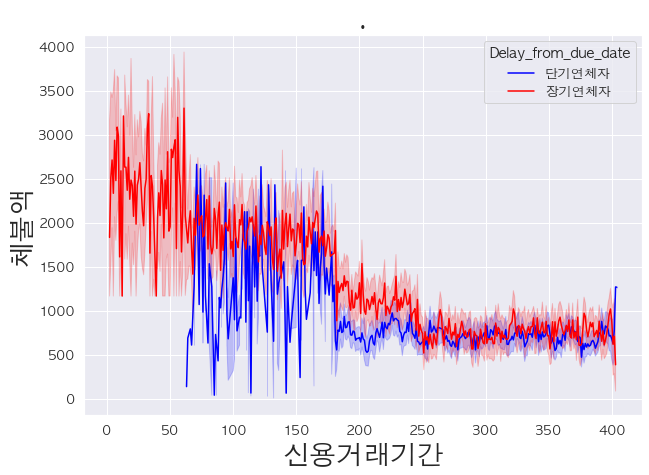

-220

In [101]:
x = "Credit_History_Age"
y = "Outstanding_Debt"

plt.figure(figsize=(10, 7))
sns.lineplot(
    data=df, x=x, y=y, hue="Delay_from_due_date", palette=["blue", "red"])

plt.title(" ", size=27, fontweight="bold")
plt.xlabel('신용거래기간', size=27, fontweight="bold")
plt.ylabel('체불액', size=27, fontweight="bold")
plt.show()

# 단기연체자의 경우 
# 65 - 180
# 180 - 400

신용거래기간 65~180개월 고객의 평균 체불액(단기,장기연제자별)

In [113]:
def Date(x):
    date = list(range(65, 180, 1))
    if x in date:
        return True
    else:
        return False

In [114]:
df_group = df[df["Credit_History_Age"].map(Date)]
df_group.groupby("Delay_from_due_date").mean()[['Outstanding_Debt', 'Credit_History_Age']]

,Outstanding_Debt,Credit_History_Age
Delay_from_due_date,,
단기연체자,1320.633895,124.622093
장기연체자,1874.912527,121.073650


## 2 ) 나이별 체별횟수

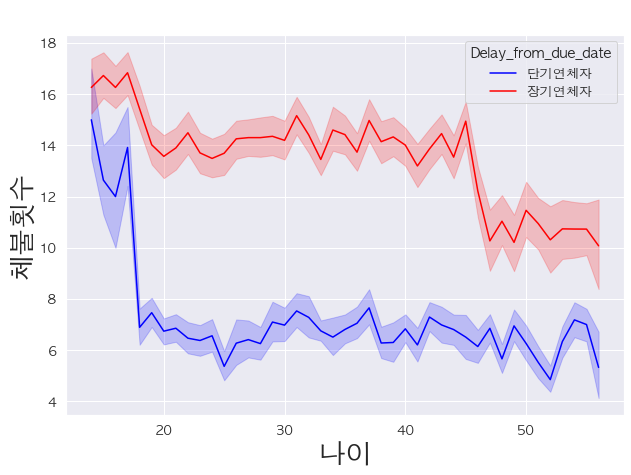

In [109]:
x = "Age"
y = "Num_of_Delayed_Payment"

plt.figure(figsize=(10, 7))
sns.lineplot(
    data=df, x=x, y=y, hue="Delay_from_due_date", palette=["blue", "red"])

plt.title(" ", size=27, fontweight="bold")
plt.xlabel('나이', size=27, fontweight="bold")
plt.ylabel('체불횟수', size=27, fontweight="bold")
plt.show()

나이 20~45 고객의 평균 체불횟수(단기,장기연제자별)

In [135]:
def Age(x):
    Range = list(range(20, 46, 1))
    if x in Range:
        return True
    else:
        return False

In [136]:
df_group = df[df["Age"].map(Age)]
df_group.groupby("Delay_from_due_date").mean()[['Num_of_Delayed_Payment', 'Age']]

,Num_of_Delayed_Payment,Age
Delay_from_due_date,,
단기연체자,6.700599,32.386789
장기연체자,14.121869,32.466297


## 3 ) 나이별 체불액

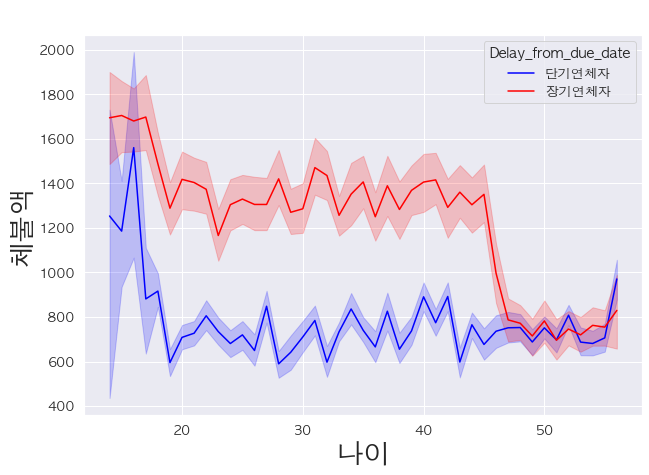

In [105]:
x = "Age"
y = "Outstanding_Debt"

plt.figure(figsize=(10, 7))
sns.lineplot(
    data=df, x=x, y=y, hue="Delay_from_due_date", palette=["blue", "red"])

plt.title(" ", size=27, fontweight="bold")
plt.xlabel('나이', size=27, fontweight="bold")
plt.ylabel('체불액', size=27, fontweight="bold")
plt.show()

나이 20~45 고객의 평균 체불액(단기,장기연제자별)

In [137]:
def Age(x):
    Range = list(range(20, 46, 1))
    if x in Range:
        return True
    else:
        return False

In [138]:
df_group = df[df["Age"].map(Age)]
df_group.groupby("Delay_from_due_date").mean()[['Outstanding_Debt', 'Age']]

,Outstanding_Debt,Age
Delay_from_due_date,,
단기연체자,734.596665,32.386789
장기연체자,1340.445019,32.466297


## 4 ) 최소금액지불여부에 따른 신용점수

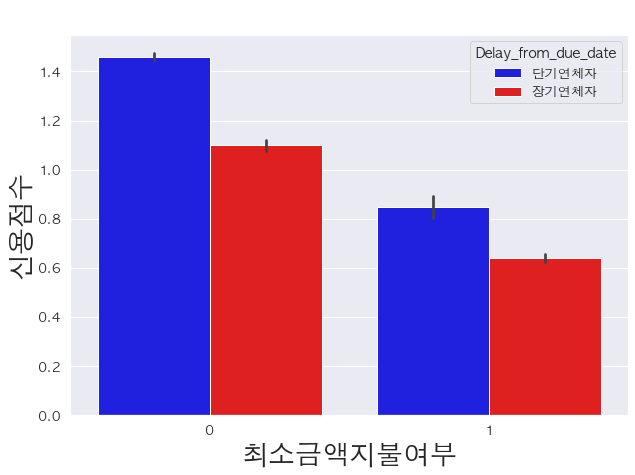

In [142]:
x = "Payment_of_Min_Amount_Yes" # 신용거래기간
y = "Credit_Score"

plt.figure(figsize=(10, 7))
sns.barplot(
    data=df, x=x, y=y, hue="Delay_from_due_date", palette=["blue", "red"])

plt.title(" ", size=27, fontweight="bold")
plt.xlabel('최소금액지불여부', size=27, fontweight="bold")
plt.ylabel('신용점수', size=27, fontweight="bold")
plt.show()

In [143]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15714,15715,15716,15717,15718,15719,15720,15721,15722,15723
Age,23.0,23.0,33.0,23.0,23.0,28.0,28.0,28.0,28.0,28.0,...,23.0,38.0,32.0,27.0,39.0,35.0,26.0,35.0,50.0,29.0
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,34847.84,34847.84,34847.84,...,43457.34,30739.3,30962.65,70218.36,43516.38,14526.58,81268.8,96650.64,80191.38,30411.9
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,3037.986667,3037.986667,3037.986667,...,3666.445,2298.608333,2711.220833,5937.53,3635.365,1318.548333,6849.4,8197.22,6293.827869,2772.325
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,6.0,4.0,8.0,8.0,8.0,5.0,8.0,3.0,2.0,4.0
Num_Credit_Card,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,4.0,4.0,3.0,5.0,7.0,7.0,7.0,3.0,6.0
Interest_Rate,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,...,31.0,13.0,11.0,6.0,18.0,31.0,19.0,12.0,3.0,11.0
Num_of_Loan,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,...,4.0,6.0,0.0,7.0,3.0,7.0,0.0,4.0,4.0,6.0
Num_of_Delayed_Payment,7.0,7.0,7.0,8.0,6.0,4.0,-1.0,3.0,1.0,0.0,...,19.0,8.0,12.0,12.0,10.0,20.0,17.0,14.0,4.0,14.0
Changed_Credit_Limit,11.27,11.27,6.27,11.27,11.27,5.42,5.42,5.42,6.42,5.42,...,8.24,16.7,5.4,4.12,4.98,12.1,10.91,2.18,11.94,8.68
Num_Credit_Inquiries,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,...,11.0,5.0,6.0,5.0,4.0,7.0,2.0,6.0,7.0,10.0


## 5 ) 계좌수에 따른 신용점수

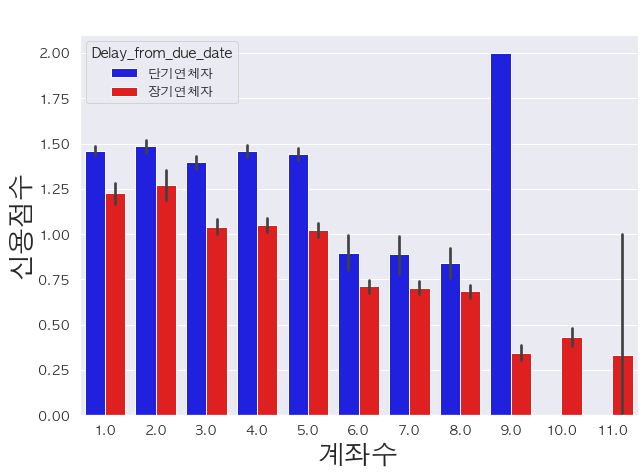

In [150]:
x = "Num_Bank_Accounts" # 신용거래기간
y = "Credit_Score"

plt.figure(figsize=(10, 7))
sns.barplot(
    data=df, x=x, y=y, hue="Delay_from_due_date", palette=["blue", "red"])

plt.title(" ", size=27, fontweight="bold")
plt.xlabel('계좌수', size=27, fontweight="bold")
plt.ylabel('신용점수', size=27, fontweight="bold")
plt.show()

## 6 ) 계좌수에 따른 연소득

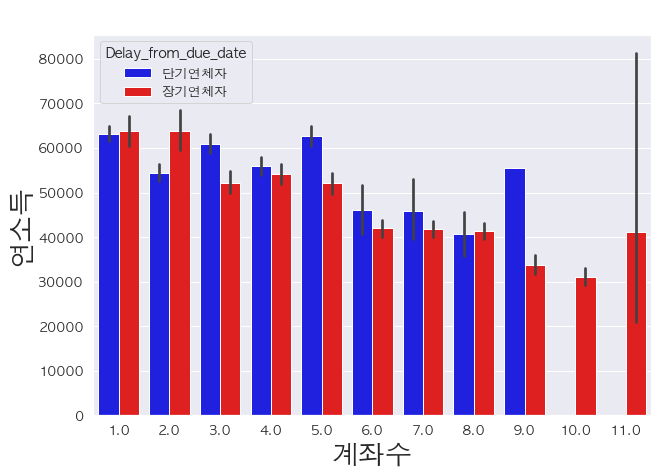

In [153]:
x = "Num_Bank_Accounts" # 신용거래기간
y = "Annual_Income"

plt.figure(figsize=(10, 7))
sns.barplot(
    data=df, x=x, y=y, hue="Delay_from_due_date", palette=["blue", "red"])

plt.title(" ", size=27, fontweight="bold")
plt.xlabel('계좌수', size=27, fontweight="bold")
plt.ylabel('연소득', size=27, fontweight="bold")
plt.show()

끝!